# In Depth: Linear Regression

Such models are popular because they can be fit very quickly, and are very interpretable. We are probably familiar with the simplest form of a linear regression model (i.e., fitting a straight line to data) but such models can be extended to model more complicated data behavior.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

# Simple Linear Regression

A straight-line fit is a model of the form $y = ax + b$ where $a$ is commonly known as the slope, and $b$ is commonly known as the intercept.

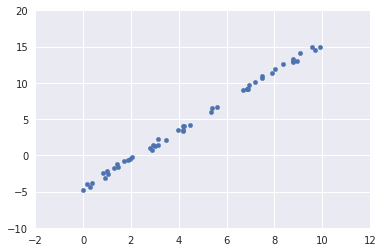

In [12]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.rand(50)
plt.axis([-2, 12, -10, 20])
plt.scatter(x, y, s=20);

We can use Scikit-Learn's `LinearRegression` estimator to fit this data and construct the best-fit line:

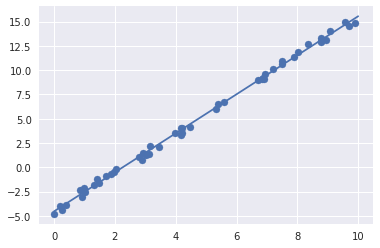

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

The slope and intercept of the data are contained in the model's fit parameters, which is Scikit-Learn are always marked by a trailing underscore. Here the relevant parameters are `coef_` and `intercept_`:

In [30]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.00823024322775
Model intercept: -4.5336529720991265


We see that the results are very close to the inputs, as we might hope.

The `LinearRegression` estimator is much more capable that this, however--in addition to simple straight-line fits, it can handle multidimensional linear models to the form <br>
                $$y = a_0 + a_1x_1 + a_2x_2 + ...$$
                
where there are multiple $x$ values. Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.        

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

In [34]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000127
[ 1.5 -2.   1. ]


Here the y data is constructed from three random x values, and the linear regression recovers the coefficients used to construct the data.

In this way, we can use the single `LinearRegression` estimator to fit lines, planes, or hyperplanes to our data. It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well.

## Polunomial basis function

This polynomial projection is useful enough that it is built into Scikit-Learn, using the `PolynomialFeatures` transformer:

In [35]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

We see here that the transformer has converted our one-dimensional array into a three-dimensional array by taking the exponent of each value. This new, higher-dimensional data representation can then be plugged into a linear regression.

The cleanest way to accomplish this is to use a pipeline. Let's make a 7th-degree polynomial model in this way:

In [36]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                          LinearRegression())

With this transform in place, we can use the linear model to fit much more complicated relationships between $x$ and $y$. For example, here is a sine wave with noise:

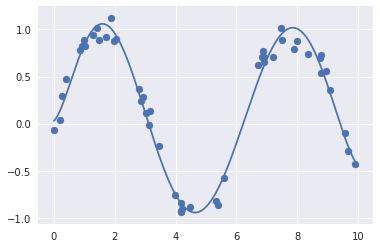

In [38]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);